In [64]:
# Wszystkie potrzebne funkcje zostały umieszczone w skrypice ActiveUsers.py
import ActiveUsers as ac

# Ranking aktywnych użytkowników

Dla każdego serwisu możemy sprawić ranking najbardziej aktywnych użytkowników w ciągu ostatniego roku:

In [ ]:
boardgames_ranking = ac.get_ranking("boardgames")

In [66]:
boardgames_ranking

,UserId,DisplayName,CreationYear,ActiveYears,TotalActivity,TotalQuestions,TotalAnswers,TotalComments
0,2602.0,GendoIkari,2012,9,257.0,4.0,93.0,160.0
1,22772.0,Andrew,2017,4,235.0,1.0,54.0,180.0
2,2537.0,murgatroid99,2012,9,230.0,2.0,56.0,172.0
3,22346.0,L. Scott Johnson,2017,4,186.0,1.0,86.0,99.0
4,1718.0,Hackworth,2011,10,177.0,0.0,85.0,92.0
5,5001.0,Joe W,2013,8,173.0,0.0,29.0,144.0
6,29834.0,ManoFromBerlin,2019,2,153.0,17.0,1.0,135.0
7,13753.0,StartPlayer,2015,6,137.0,3.0,59.0,75.0
8,22016.0,Acccumulation,2017,4,120.0,0.0,33.0,87.0
9,2880.0,ikegami,2012,9,117.0,1.0,20.0,96.0


In [67]:
boardgames_ranking.to_csv("boardgames_ranking.csv")

In [68]:
chess_ranking = ac.get_ranking("chess")
chess_ranking.to_csv("chess_ranking.csv")

D:\Studia\sem7\python\praca_domowa_3\datascience-stackexchange\ActiveUsers.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["LastAccessYear"] = users["LastAccessDate"].apply(lambda x: parse(x).year)
D:\Studia\sem7\python\praca_domowa_3\datascience-stackexchange\ActiveUsers.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["CreationYear"] = users["CreationDate"].apply(lambda x: parse(x).year)
D:\Studia\sem7\python\praca_domowa_3\datascience-stackexchange\ActiveUsers.py:98: SettingWithCopyW

# Porównanie przyrostu nowych użytkowników dla badanych serwisów

Dla każdgo serwisu generujemy ramkę danych, która zawiera informacje, ile nowych użytkowników pojawiło się na serwisie w danym roku:

In [69]:
collection_name = ["gaming", "boardgames", "chess", "poker"]
df_gaming = ac.get_new_users_by_year(collection_name[0])
df_boardgames = ac.get_new_users_by_year(collection_name[1])
df_chess = ac.get_new_users_by_year(collection_name[2])
df_poker = ac.get_new_users_by_year(collection_name[3])

Łączymy wszystki ramki w jedną, a wartości nieokreślone zamieniamy na 0:

In [70]:
df1 = df_gaming.merge(df_boardgames, how="outer", on="CreationYear", suffixes=("_gaming", "_board"))
df2 = df_chess.merge(df_poker, how="outer", on="CreationYear", suffixes=("_chess", "_poker"))
df = df1.merge(df2, how="outer", on="CreationYear")
df.fillna(0, inplace=True)
df.to_csv("creation_year_all.csv")
df

,CreationYear,NewUsersNumber_gaming,NewUsersNumber_board,NewUsersNumber_chess,NewUsersNumber_poker
0,2010,4137,546,0.0,0.0
1,2011,8222,1345,0.0,0.0
2,2012,12809,1310,846.0,686.0
3,2013,12966,1577,1175.0,438.0
4,2014,14597,2499,2114.0,598.0
5,2015,16326,2870,2170.0,819.0
6,2016,20936,3006,2473.0,806.0
7,2017,23464,3363,3079.0,815.0
8,2018,18568,3012,2717.0,712.0
9,2019,17110,3175,2789.0,753.0


Do porównania serwisów stworzony zostanie wykres:

In [28]:
import matplotlib.pyplot as plt

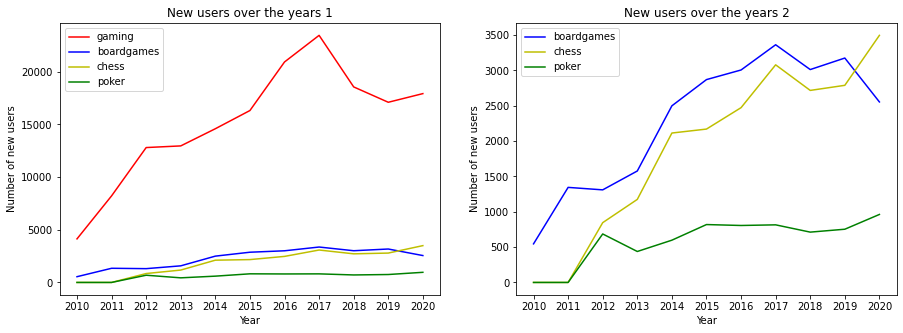

In [59]:
year = df["CreationYear"].tolist()
gaming = df["NewUsersNumber_gaming"].tolist()
board = df["NewUsersNumber_board"].tolist()
chess = df["NewUsersNumber_chess"].tolist()
poker = df["NewUsersNumber_poker"].tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
ax1.plot(year, gaming, 'r', year, board, 'b', year, chess, 'y', year, poker, 'g')
ax1.set_xticks(year)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of new users")
ax1.legend(collection_name)
ax1.set_title("New users over the years 1")

ax2.plot(year, board, 'b', year, chess, 'y', year, poker, 'g')
ax2.set_xticks(year)
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of new users")
ax2.legend(collection_name[1:])
ax2.set_title("New users over the years 2")

plt.show()

Najwięcej nowych użytkowników ma największy serwis - gamingowy. Z pozostałych trzech serwisów do 2019 roku najbardziej popularny był serwis gier planszowych. Teraz widać, że coraz większym powodzeniem cieszą się szachy. A z nowym serialem "Gambit Królowej" można podejrzewać, że ten serwis będzie również popularny w 2021 roku. 